In [45]:
import numpy as np
import matplotlib.pyplot as plt
import mne
import pandas as pd
import os

In [2]:
# импортируем данные формата brainvision
raw = mne.io.read_raw_brainvision("C:\Code\Math_for_Med\LEMON\sub-010002.vhdr", preload=True)
raw

<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Admin\AppData\Local\Temp\ipykernel_29936\3922241258.py:2: SyntaxWarning: invalid escape sequence '\C'
  raw = mne.io.read_raw_brainvision("C:\Code\Math_for_Med\LEMON\sub-010002.vhdr", preload=True)


Extracting parameters from C:\Code\Math_for_Med\LEMON\sub-010002.vhdr...
Setting channel info structure...
Reading 0 ... 2554999  =      0.000 ...  1022.000 secs...


<RawBrainVision | sub-010002.eeg, 62 x 2555000 (1022.0 s), ~1.18 GiB, data loaded>

In [3]:
raw.info


<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, T7, C3, Cz, ...
 chs: 62 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 1000.0 Hz
 meas_date: 2013-11-11 13:47:40 UTC
 nchan: 62
 projs: []
 sfreq: 2500.0 Hz
>

In [4]:
channels = raw.ch_names
channels

['Fp1',
 'Fp2',
 'F7',
 'F3',
 'Fz',
 'F4',
 'F8',
 'FC5',
 'FC1',
 'FC2',
 'FC6',
 'T7',
 'C3',
 'Cz',
 'C4',
 'T8',
 'VEOG',
 'CP5',
 'CP1',
 'CP2',
 'CP6',
 'AFz',
 'P7',
 'P3',
 'Pz',
 'P4',
 'P8',
 'PO9',
 'O1',
 'Oz',
 'O2',
 'PO10',
 'AF7',
 'AF3',
 'AF4',
 'AF8',
 'F5',
 'F1',
 'F2',
 'F6',
 'FT7',
 'FC3',
 'FC4',
 'FT8',
 'C5',
 'C1',
 'C2',
 'C6',
 'TP7',
 'CP3',
 'CPz',
 'CP4',
 'TP8',
 'P5',
 'P1',
 'P2',
 'P6',
 'PO7',
 'PO3',
 'POz',
 'PO4',
 'PO8']

In [ ]:
raw.plot()

Using qt as 2D backend.


Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 0.819 (s)
Plotting power spectral density (dB=True).


C:\Users\Admin\AppData\Local\Temp\ipykernel_29936\4109650872.py:4: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_occipital_psd.plot()
c:\Code\Math_for_Med\.venv\Lib\site-packages\mne\viz\utils.py:160: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


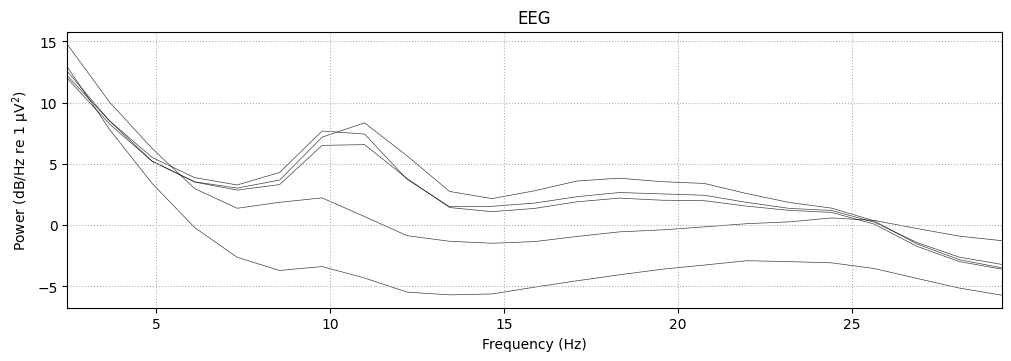

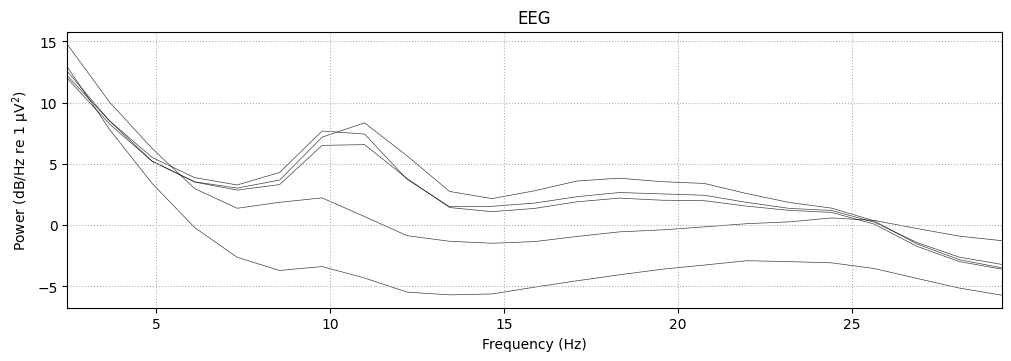

In [7]:
raw_occipital = raw.copy().pick_channels(['O1','O2','Oz','F4','F8'])
raw_occipital_psd = raw_occipital.compute_psd(fmin = 2, fmax = 30)
raw_occipital.plot()
raw_occipital_psd.plot()


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 8251 samples (3.300 s)

Effective window size : 0.819 (s)
Plotting power spectral density (dB=True).


C:\Users\Admin\AppData\Local\Temp\ipykernel_29936\710869217.py:4: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_occipital_psd.plot()
c:\Code\Math_for_Med\.venv\Lib\site-packages\mne\viz\utils.py:160: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


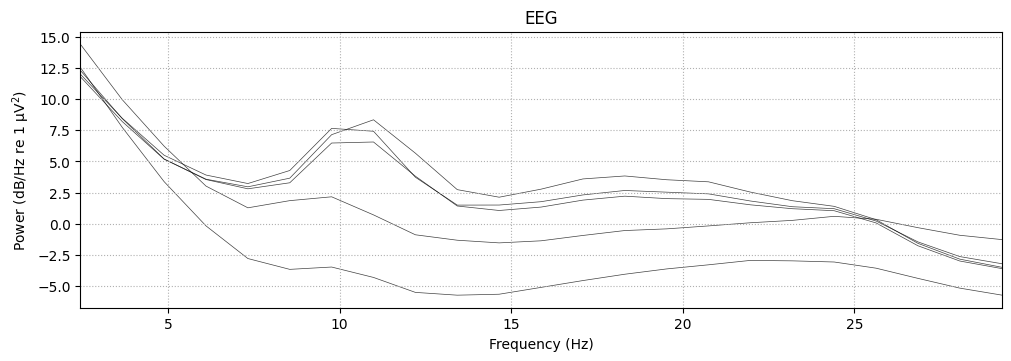

In [49]:
raw_occipital = raw_occipital.filter(l_freq = 1, h_freq = 40)
raw_occipital_psd = raw_occipital_filtered.compute_psd (fmin = 2, fmax = 30)
raw_occipital.plot()
raw_occipital_psd.plot()

In [50]:
# Показать только УНИКАЛЬНЫЕ метки
print(set(raw.annotations.description))

{np.str_('Stimulus/S210'), np.str_('Stimulus/S200'), np.str_('Stimulus/S  1'), np.str_('Comment/no USB Connection to actiCAP')}


In [51]:
events, event_id = mne.events_from_annotations(raw)
print(events[:5])
print(event_id)


Used Annotations descriptions: [np.str_('Comment/no USB Connection to actiCAP'), np.str_('Stimulus/S  1'), np.str_('Stimulus/S200'), np.str_('Stimulus/S210')]
[[    0     0 10001]
 [ 9979     0     1]
 [15938     0     1]
 [15962     0   210]
 [20962     0   210]]
{np.str_('Comment/no USB Connection to actiCAP'): 10001, np.str_('Stimulus/S  1'): 1, np.str_('Stimulus/S200'): 200, np.str_('Stimulus/S210'): 210}


In [52]:
event_dict =  {'Open': 200, 'Closed': 210}

In [53]:
epochs_occipital = mne.Epochs (raw_occipital_filtered, events, event_id = event_dict, preload=True)

Not setting metadata
480 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 480 events and 1751 original time points ...


0 bad epochs dropped


    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...


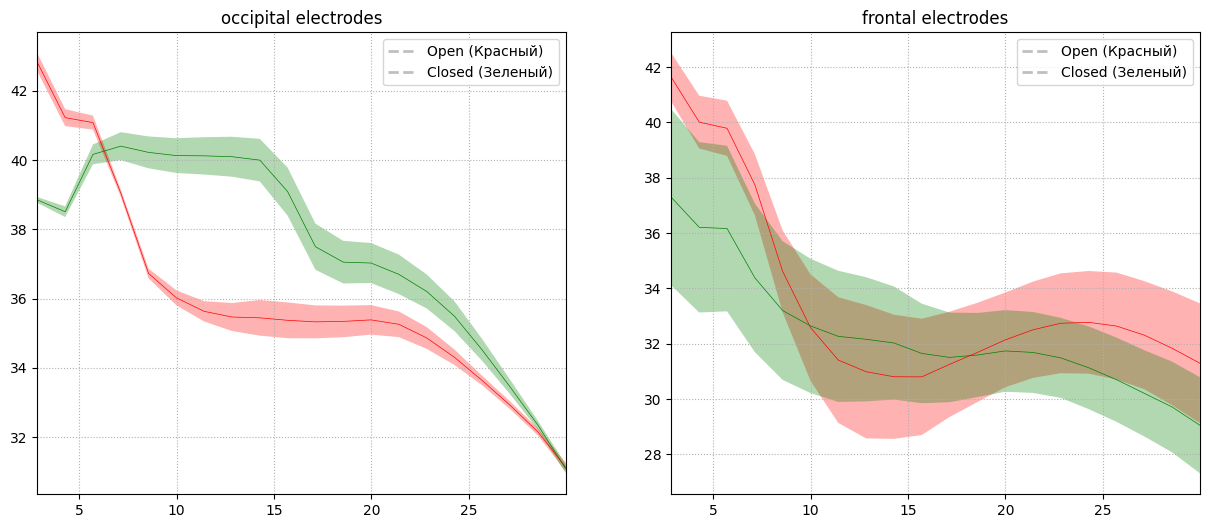

In [67]:
fig, ax = plt.subplots(1,2, figsize = (15,6))

epochs_occipital['Open'].compute_psd(fmin=2, fmax=30, picks = ['O1','O2','Oz']).plot(axes = ax[0], color = 'red', average=True)
epochs_occipital['Closed'].compute_psd(fmin=2, fmax=30, picks = ['O1','O2','Oz']).plot(axes = ax[0], color = 'green', average=True)

ax[0].set_title('occipital electrodes')
ax[0].legend(['Open (Красный)', 'Closed (Зеленый)'])

epochs_occipital['Open'].compute_psd(fmin=2, fmax=30, picks = ['F4','F8']).plot(axes = ax[1], color = 'red', average=True)
epochs_occipital['Closed'].compute_psd(fmin=2, fmax=30, picks = ['F4','F8']).plot(axes = ax[1], color = 'green', average=True)

ax[1].set_title('frontal electrodes')
ax[1].legend(['Open (Красный)', 'Closed (Зеленый)'])

plt.show()